<a href="https://colab.research.google.com/github/divisha30/ML-learning-/blob/main/Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib
%matplotlib inline

In [ ]:
tips=sns.load_dataset('tips')

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


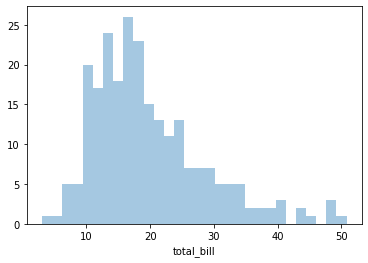

In [ ]:
#dist plot - shows univariant set of observations 
sns.distplot(tips['total_bill'],kde=False,bins=30)

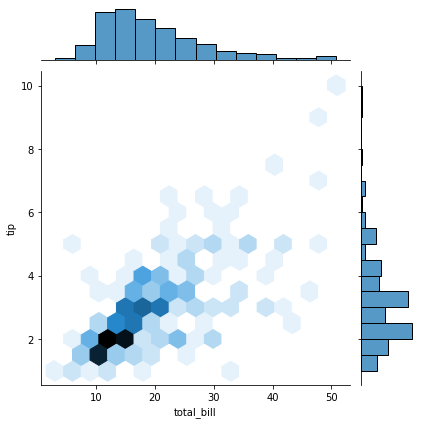

In [ ]:
#jointplot-match 2 distplots for bi-variant data
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')#kde,reg
#hex is the way if we want dots or hex extc shapes like that 

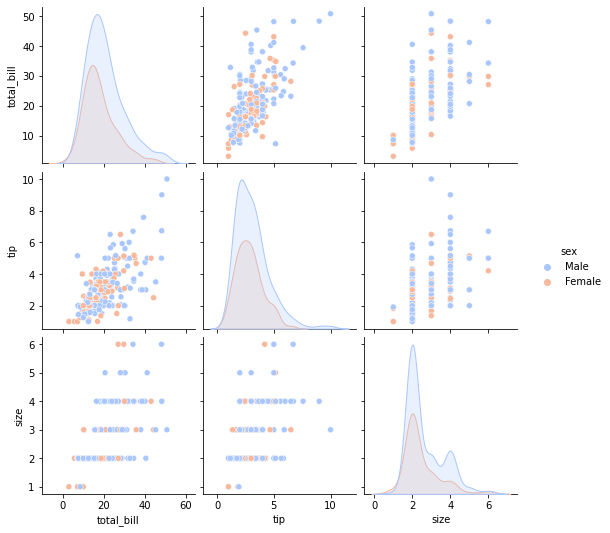

In [ ]:
#pairplot-plots the pair wise relationships in the datadrames 
#does joint plot for every single combination larger the dataframe the longer time it takes to execute 
sns.pairplot(tips,hue='sex',palette='coolwarm')

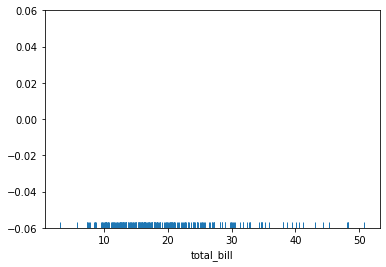

In [ ]:
sns.rugplot(tips['total_bill'])

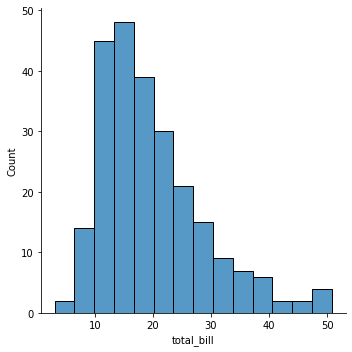

In [ ]:
sns.displot(tips['total_bill'],kde=False)

(0.0, 1.0)

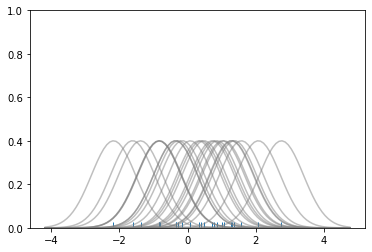

In [ ]:
#kde-kernel density estimation plots
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

 #create dataset 
dataset=np.random.randn(25)

 #create another 
sns.rugplot(dataset);

 #Set up the x-axis for the plot
x_min=dataset.min()-2
x_max=dataset.max()+2

 #100 equally spaced points from x_min to x_max
x_axis=np.linspace(x_min,x_max,100)

#set up the bandwidth, for info of this:
url='https://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth=((4*dataset.std()**5)/(3*len(dataset)))**.2

#create an empty kernel list 
kernel_list=[]

#plot each basis function
for data_point in dataset:
  #create a kernel for each point and append to list
  kernel=stats.norm(data_point,bandwidth).pdf(x_axis)
  kernel_list.append(kernel)

  #scale for plotting 
  kernel=kernel/kernel.max()
  kernel=kernel* .4
  plt.plot(x_axis,kernel,color='grey',alpha=0.5)

plt.ylim(0,1)


Text(0.5, 0.98, 'Sum of Basis Functions')

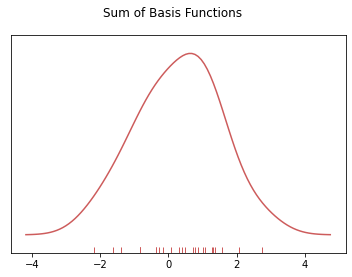

In [ ]:
#To get the kde plot we can sum these basis functions.

#Plot the sum of the basis function
sum_of_kde=np.sum(kernel_list,axis=0)

#plot figure
fig=plt.plot(x_axis,sum_of_kde,color='indianred')

#Add the initial rugplot
sns.rugplot(dataset,c='indianred')

#get rid of y-tick marks
plt.yticks([])
#Set title
plt.suptitle("Sum of Basis Functions")

In [ ]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


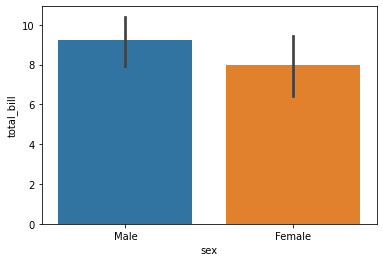

In [ ]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std )

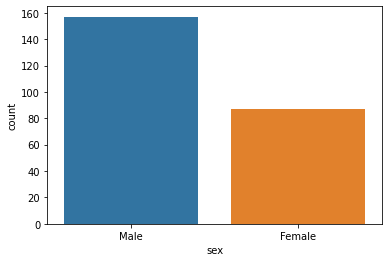

In [ ]:
sns.countplot(x='sex',data=tips)

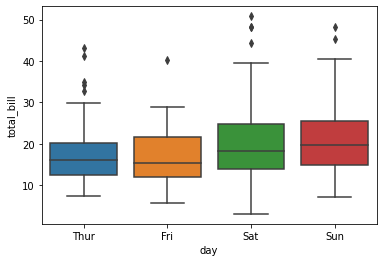

In [ ]:
sns.boxplot(x='day',y='total_bill',data=tips)

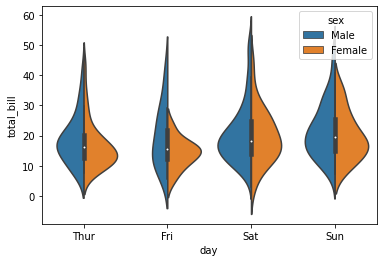

In [ ]:
#violin plots
sns.violinplot(x='day',y='total_bill',data=tips ,hue='sex',split=True)

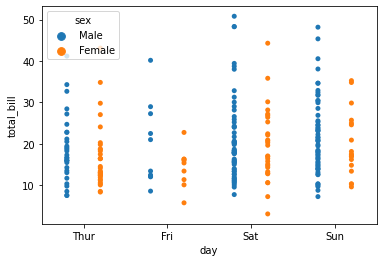

In [ ]:
#strip plot
sns.stripplot(x='day',y='total_bill',data=tips,jitter=False,hue='sex',dodge=True)

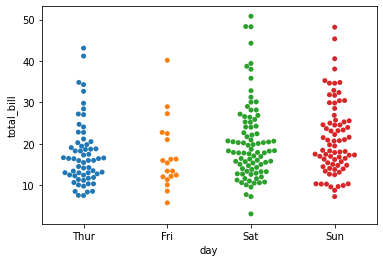

In [ ]:
#swarm plot-points dont overlap combination of strip and violin
#they dont scale for very large numbers and take a lot of computation
#no for large datsets 
sns.swarmplot(x='day',y='total_bill',data=tips)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


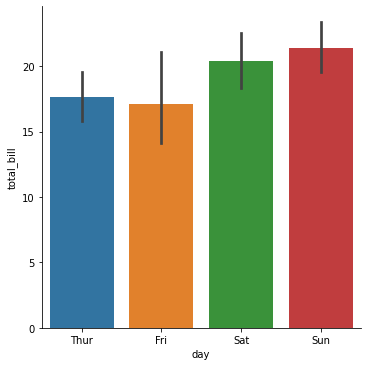

In [ ]:
sns.factorplot(x='day',y='total_bill',data=tips,kind='bar')

In [ ]:
#matrix plots -primarily heat maps
flights=sns.load_dataset('flights')
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


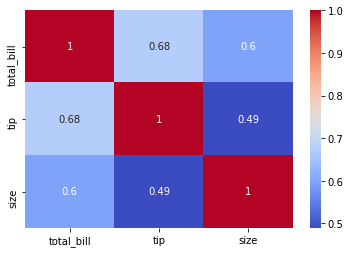

In [ ]:
sns.heatmap(tips.corr(),annot=True,cmap='coolwarm')

In [ ]:
 fp=flights.pivot_table(index='month',columns='year',values='passengers')

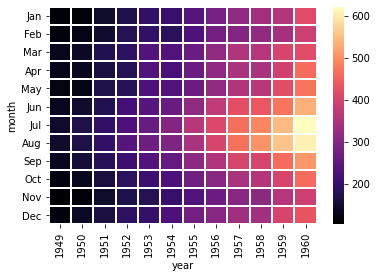

In [ ]:
sns.heatmap(fp,cmap='magma',linecolor='white',linewidths=1)

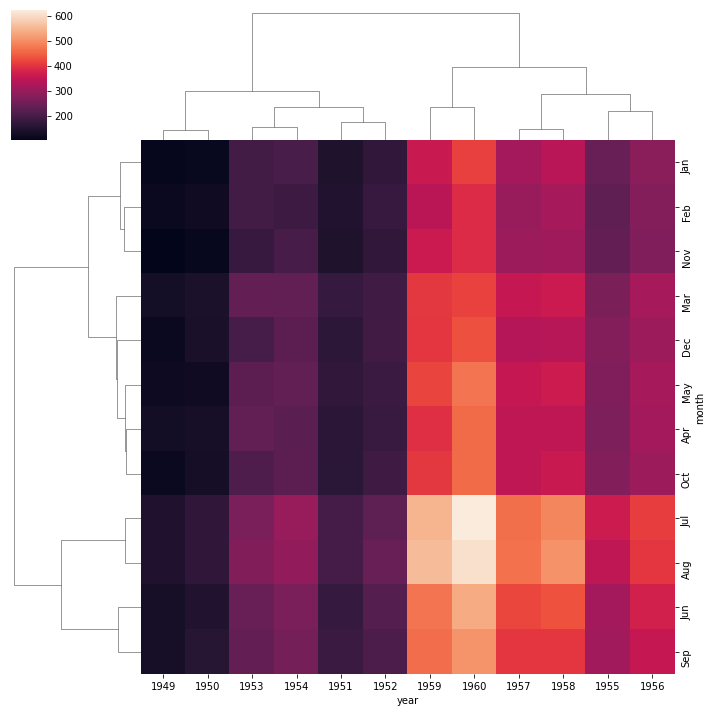

In [ ]:
sns.clustermap(fp)#labels clustered acc to the info that are similar to each other so they are not in order in the labels

In [ ]:
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

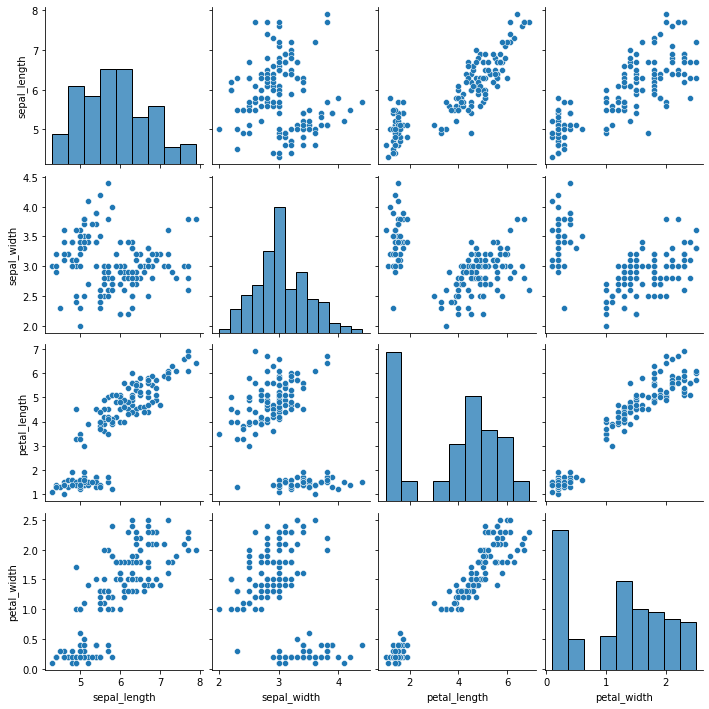

In [ ]:
sns.pairplot(iris)

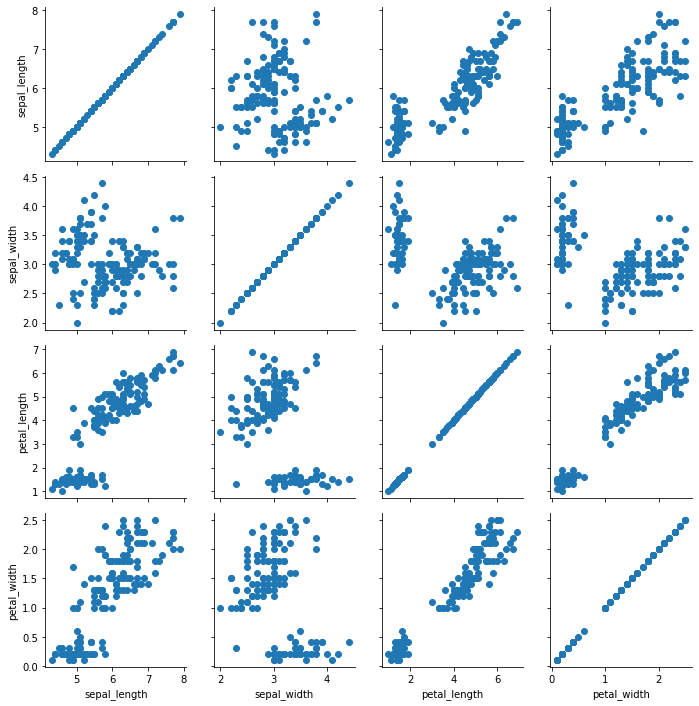

In [ ]:
 g=sns.PairGrid(iris)
 g.map(plt.scatter)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

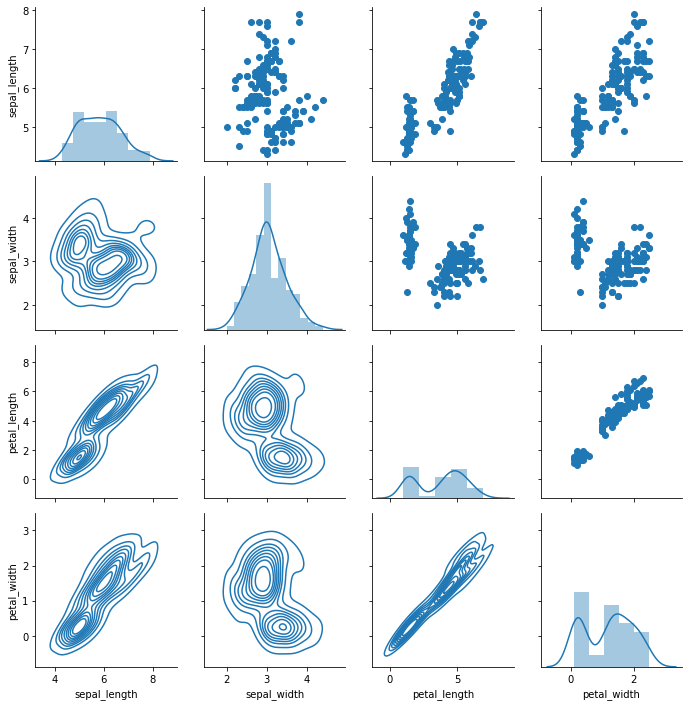

In [ ]:
g=sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

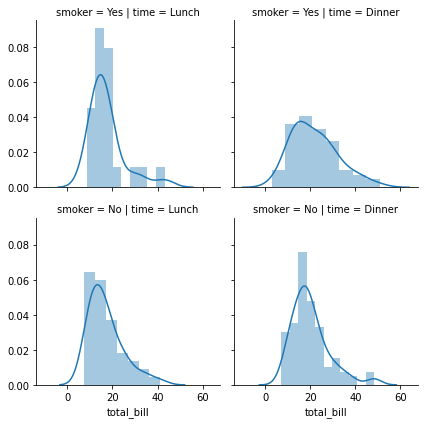

In [ ]:
#facet grid-
g=sns.FacetGrid(tips,col='time',row='smoker')
g.map(sns.distplot,'total_bill')

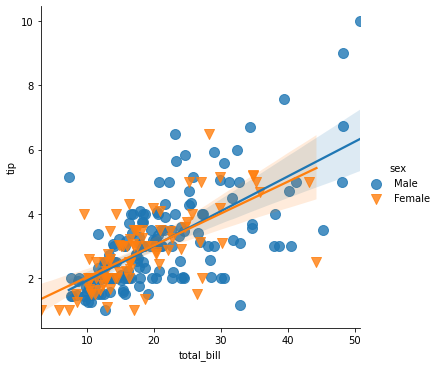

In [ ]:
 #regression plots -lm   plot function thats allows you to display along with seaborn
 sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'],scatter_kws={'s':100})

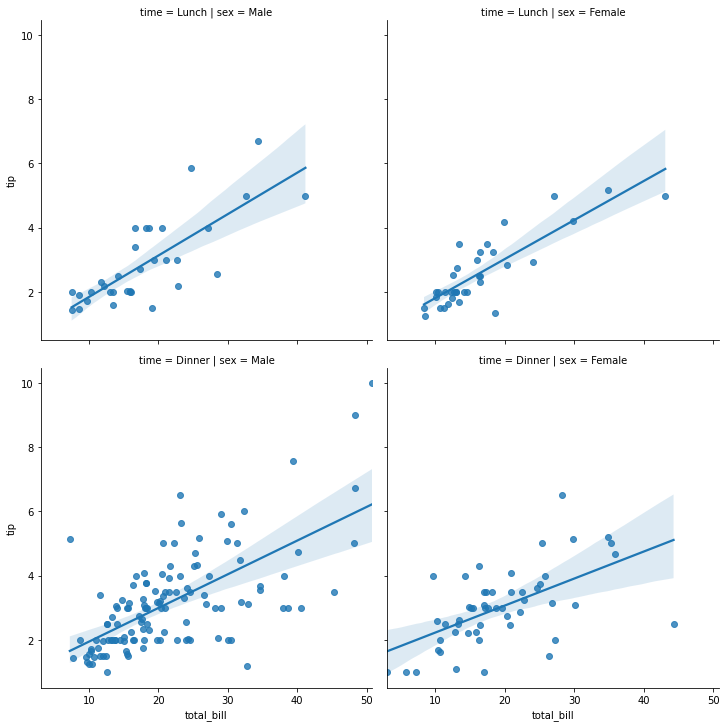

In [ ]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex',row='time')

In [ ]:
#seaborn gives more of aspect and size ratio

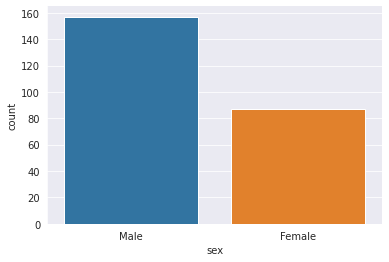

In [ ]:
sns.set_style('darkgrid')
sns.countplot(x='sex',data=tips)
sns.despine()

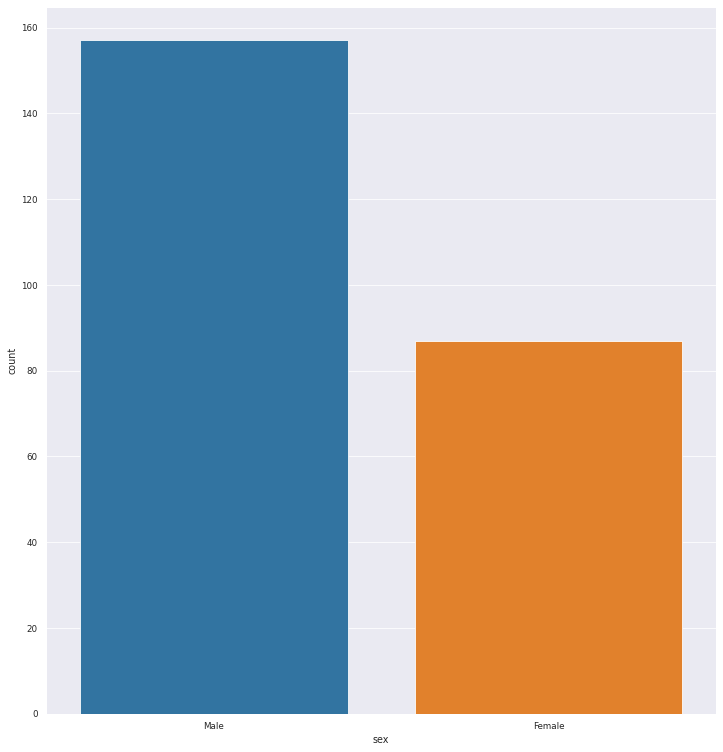

In [ ]:
plt.figure(figsize=(12,13))
sns.countplot(x='sex',data=tips)
sns.set_context('notebook')

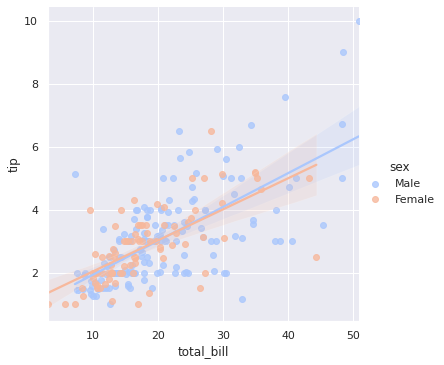

In [ ]:
sns.lmplot(x='total_bill',y='tip',data=tips,palette='coolwarm',hue='sex')